<a href="https://colab.research.google.com/github/MarioROT/CV-MAI/blob/main/Session%204/p4_template_matching_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #4 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [1]:
%%shell
git clone https://github.com/mariorot/CV-MAI
mv CV-MAI/scripts/* /content/
mv 'CV-MAI/Session 4/images' /content/

Cloning into 'CV-MAI'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 224 (delta 10), reused 31 (delta 3), pack-reused 175
Receiving objects: 100% (224/224), 31.10 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [34]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt, colors
import os
from skimage import color, data, exposure, feature, filters, io, transform

# Importing a custom function just for plots
import custom_plots as cp

## Template Matching

### Exercise #1: Normalized correlation

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.

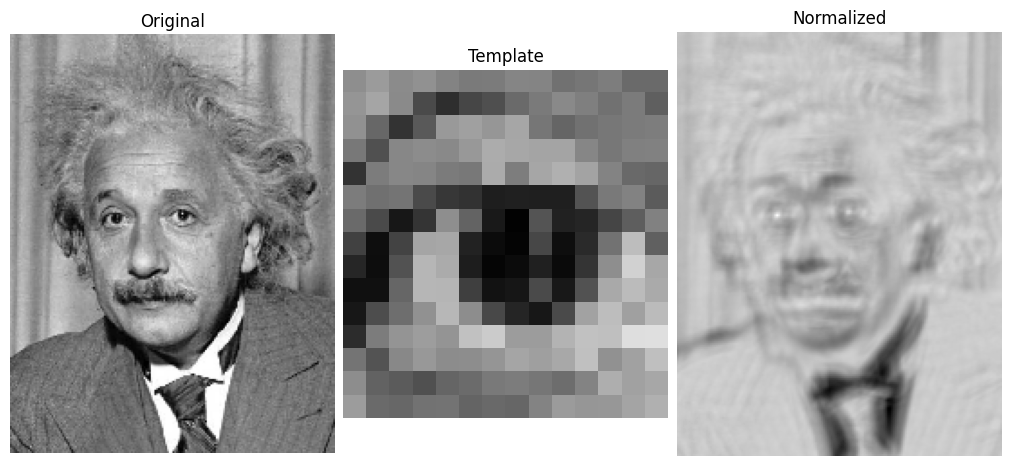

In [125]:
# solution
dir= "images/"
einstein=io.imread(dir+'einstein.png')
template=io.imread(dir+'template.png')
normalized= feature.match_template(einstein,template)

cp.custom_grids([einstein,template,normalized],1,3,['Original','Template','Normalized'],axis='off',cmap='gray').show()


*   What is the output of the normalized cross-correlation function?

**Solution**

The output of the normalized cross correlation function as its name implies, is a 2D array with normalized values from 0 to 1, where the higher values represent the more similarity/correlation of the pixels of the template, with the pixels of the part of the image that was analyzed.
...

The output of match_template function gives the response image with correlation coefficients. Let us visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input and return a bw image
    *   The function should convert the normalized cross-correlation image to a thresholded image.

In [60]:
# solution
def norm_to_bw(imag,treshold=0.9):
  bw=np.ones([imag.shape[0],imag.shape[1]],dtype=int)
  for i in range(bw.shape[0]):
    for j in range(bw.shape[1]):
     if imag[i][j]>treshold:
       bw[i][j] *= 255
     else:
       bw[i][j] *=0
  return bw

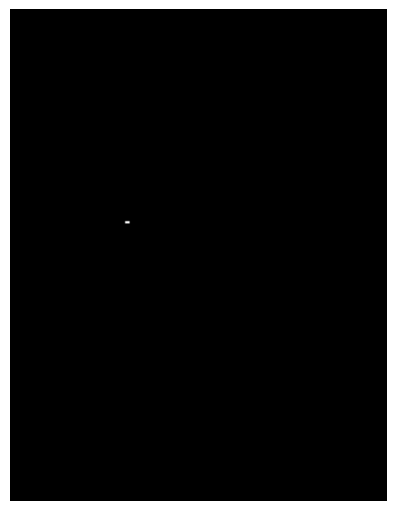

In [128]:
# solution

bw=norm_to_bw(normalized)
cp.custom_grids([bw],1,1,cmap='gray',figsize=(5,5),axis='off').show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

*   Visualize the thresholded image on top of the original image. Show the exact location of the match in red color.
*   *Hint: learn about alpha channels and listed colormaps in matplotlib*

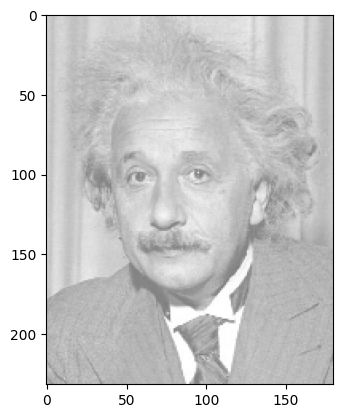

In [152]:
bw_resized= transform.resize(bw, einstein.shape[0:2], preserve_range=True)

bw_inverted=bw_resized.copy()
for i in range(bw_resized.shape[0]):
    for j in range(bw_resized.shape[1]):
     if bw_resized[i][j]==255:
       bw_inverted[i][j]==0
     else:
       bw_inverted[i][j]=255

merged=einstein.copy()
merged[:,:,3]=bw_inverted

plt.imshow(merged, cmap= colors.ListedColormap(["red"]), alpha=0.5)

### Exercise #2: Effect of contrast

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

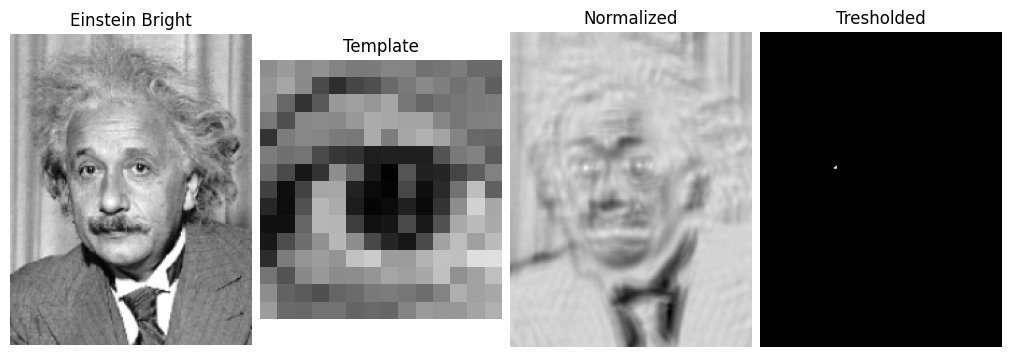

In [27]:
# solution
eins_br=io.imread(dir+'einstein_br.png')
temp=io.imread(dir+'template.png' )
norm2= feature.match_template(eins_br,temp)
tresh=norm_to_bw(norm2)

cp.custom_grids([eins_br,temp,norm2,tresh],1,4,['Einstein Bright','Template','Normalized','Tresholded'],axis='off',cmap='gray').show()

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

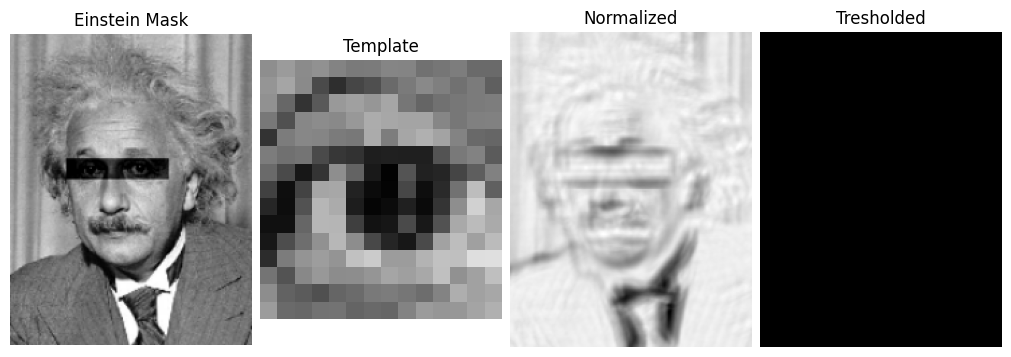

In [30]:
# solution
eins_mask=io.imread(dir+'einstein_mask.png')
temp=io.imread(dir+'template.png' )
norm3= feature.match_template(eins_mask,temp)
tresh2=norm_to_bw(norm3)

cp.custom_grids([eins_mask,temp,norm3,tresh2],1,4,['Einstein Mask','Template','Normalized','Tresholded'],axis='off',cmap='gray').show()


*   Do you find any differences in results with respect to contrast changes?
*   Explain your inferences.

**Solution**

- Since the template was extracted from the "original" Einstein imgage, when using a slighlty brighter image, even when the match is not perfect, the higher value is still in the same posoition and therefore the treshold image looks the same.

- However, when changing drastically the contraste in the corresponding eye pixels (Einstein Mask), the same process did not find a match. So we can see that even if this approach may work for some brightness/ilumination changes, it does not work in all the scenarios. So, we need to take this into account.


*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

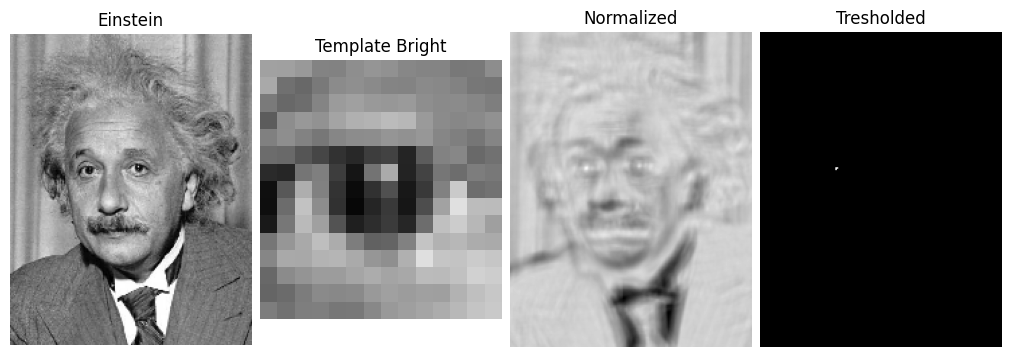

In [12]:
# solution
einstein=io.imread(dir+'einstein.png')
temp_br=io.imread(dir+'template_br.png' )
norm4= feature.match_template(einstein,temp_br)
tresh3=norm_to_bw(norm4)

cp.custom_grids([einstein,temp_br,norm4,tresh3],1,4,['Einstein','Template Bright','Normalized','Tresholded'],axis='off',cmap='gray').show()



**Solution**

- In this scenario, we can see that the difference of brightness we just talked about, works both in the template and in the image. With a small change we are still able to find a match.

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

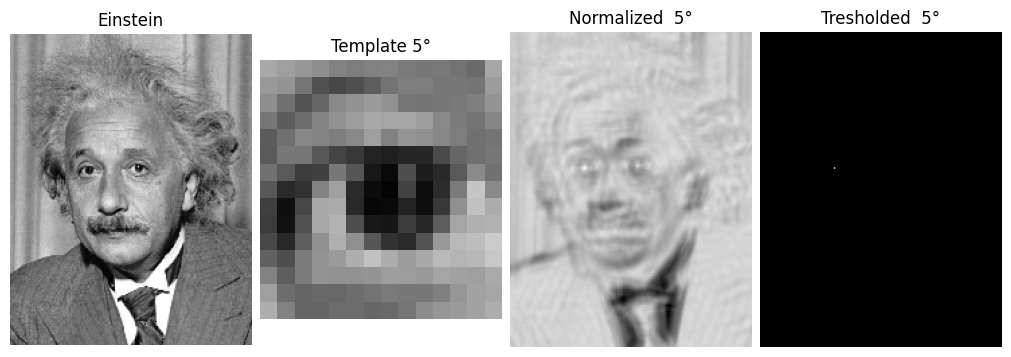

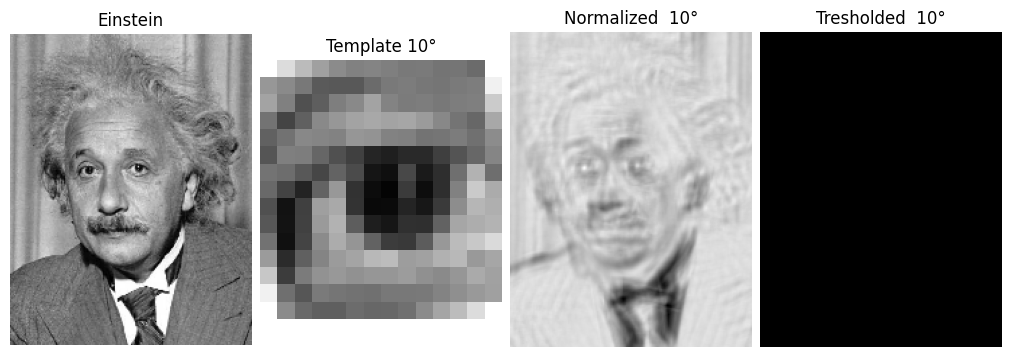

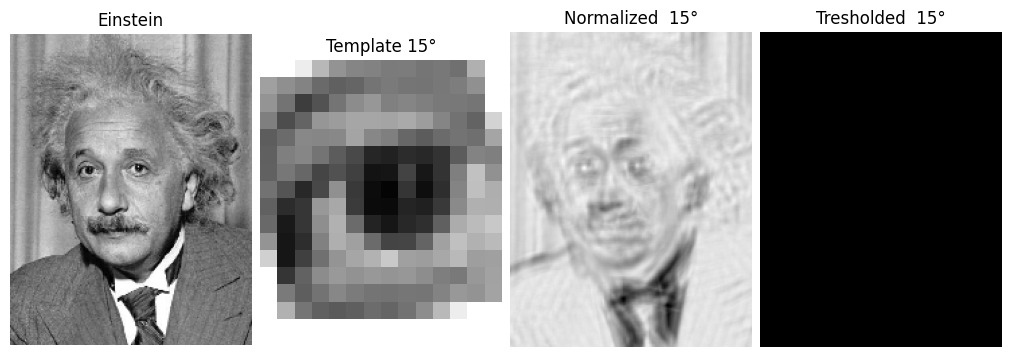

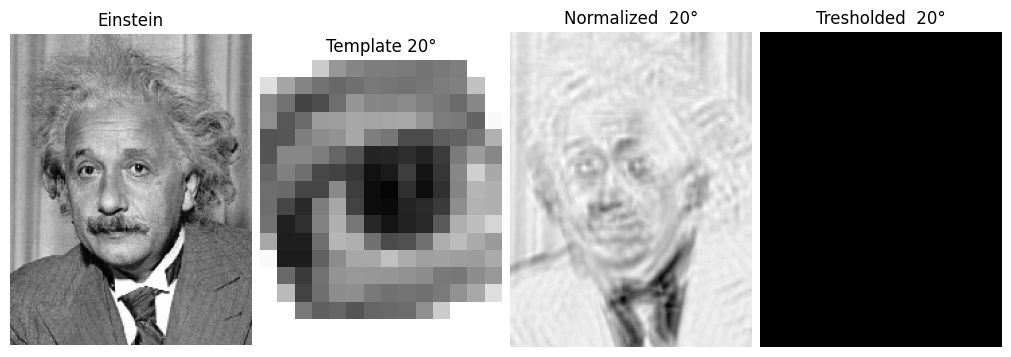

In [128]:
# solution
einstein=io.imread(dir+'einstein.png')

rotations=[5,10,15,20]

temps_rotated=[transform.rotate(io.imread(dir+'template.png'),degrees) for degrees in rotations]
norms= [feature.match_template(einstein,template) for template in temps_rotated]
tresholds=[norm_to_bw(normalized) for normalized in norms]

for _ in range(len(rotations)):
  cp.custom_grids([einstein,temps_rotated[_],norms[_],tresholds[_]],1,4,['Einstein',f'Template {rotations[_]}°',f'Normalized  {rotations[_]}°',f'Tresholded  {rotations[_]}°'],axis='off',cmap='gray').show()




*   What do you infer with respect to rotation?

**Solution**
- In this case, the template has not changed anything in brightness, however, we are modifying the position of the pixels. And in this case, we see that normalized cross correlation is more sensitive, since it still matches the template with a 5° rotation, but with a 10° rotation is not able to find it.

- This of course makes sense, since the process, matches pixel by pixel and the position is relevant to the computation.

## Histogram of Oriented Gaussians

### Exercise #1: HOG Image Visualization

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


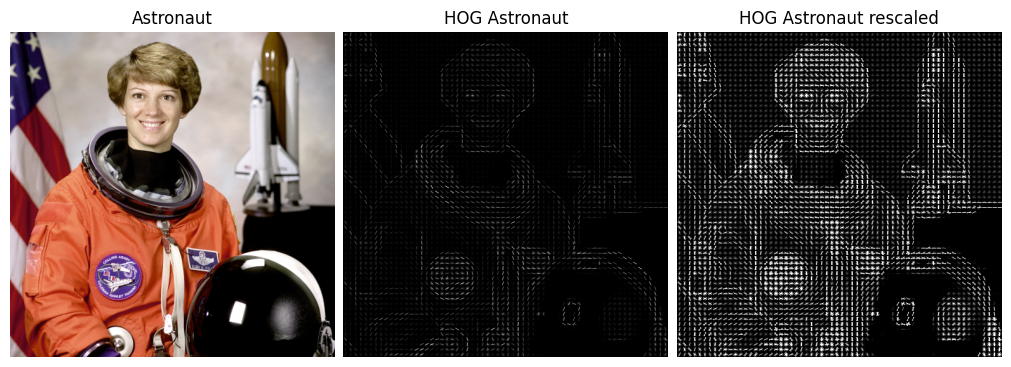

In [122]:
# solution
astr=data.astronaut()
hog_astr=feature.hog(astr,channel_axis=-1, visualize=True)[1]
hog_rescale= exposure.rescale_intensity(hog_astr, in_range=(0, 10)) #Rescale intensity to better  visualization

cp.custom_grids([astr,hog_astr,hog_rescale],1,3,['Astronaut','HOG Astronaut','HOG Astronaut rescaled'],axis='off',cmap=plt.cm.gray).show()

*   Explain the algorithm behind HOG



**Solution**

- Image Gradient Calculation:

The first step is to calculate the gradient of the image. Finding the direction and magnitude of the intensity changes at each pixel.

- Gradient Orientation Binning:

The image is divided into small cells, and for each pixel within a cell, its gradient orientation is determined. The orientation is represented as an angle.

- Histograms within Cells:

For each cell, a histogram is created to capture the distribution of gradient orientations within that cell. The histogram is divided into several bins, often 9 bins covering a 180-degree range. The magnitude of the gradients contributes to the bin values.

- Block Normalization:

To make the descriptor more robust to changes in lighting and contrast, a local normalization is applied. The image is divided into larger blocks that overlap with the cells. For each block, the histograms of the constituent cells are concatenated, and the block's values are normalized.

- Descriptor Extraction:

The final HOG descriptor for the entire image is constructed by concatenating the normalized histograms from all the blocks. This concatenated vector is used as a feature representation for the image.

*   Is it necessary to do image pre-processing to normalize the color and gamma values before applying HoG?

**Solution**

Yes, the HoG is designed to work on gray scale. So, if it is needed to use a color image, a pre-processing is neccesary.


*   What do you infer from the parameters
    *   orientation
    *   pixels_per_cell


**Solution**

- **Orientation**: It is the number of different positions/angles that we are going to consider for the gradients. The number of bins.

It affects the level of detail captured in the HOG descriptor.


- **Pixels per cell**:  It is the number of pixels that will be considered for the process on the histogram, before using the blocks. It determines the spatial resolution of the HOG descriptor.

This parameter should consider the size of the objects or patterns to detect or analyze. Smaller cell sizes capture fine details but may lead to larger feature vectors, increasing computational requirements.



*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

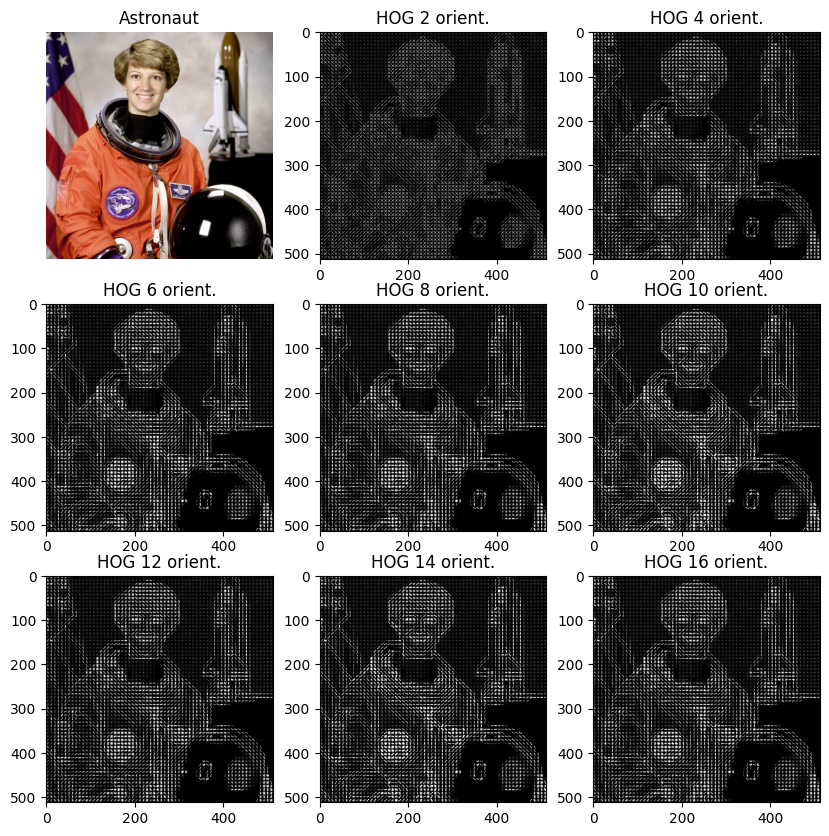

In [123]:
# solution
astr=data.astronaut()

hog_plot=cp.custom_grids([astr],3,3,['Astronaut'],axis='off',cmap=plt.cm.gray,use_grid_spec=False)
hog_plot.show()
hog_astr=[]

for values in [2,4,6,8,10,12,14,16]:
  hog=feature.hog(astr,orientations=values, channel_axis=-1, visualize=True)[1]
  rescale=exposure.rescale_intensity(hog, in_range=(0, 10)) #Rescale intensity to better  visualization
  hog_astr.append(rescale)
  hog_plot.add_plot(f'HOG {values} orient.').imshow(hog_astr[values//2-1], cmap='gray')

*   What is the role of block normalization in HoG?
*   What are the different methods available in block normalization fo skimage?

**Solution**

- Block normalization plays a crucial role in making the HOG descriptor more robust to variations in lighting and contrast within an image. I

- The different normalizations available are:

- "L1" (L1-Norm normalization): This method computes the L1-norm of the descriptor vector within each block and divides the vector by the norm. It helps in reducing the sensitivity to the total gradient magnitude in the block.

- "L2" (L2-Norm normalization): This method computes the L2-norm (Euclidean norm) of the descriptor vector within each block and normalizes the vector by this norm. It makes the descriptor invariant to overall intensity changes.

- "L2-Hysteresis" (L2-Norm with Hysteresis normalization): This method is similar to L2 normalization but includes a hysteresis threshold. It helps further reduce the influence of large gradients and emphasizes gradients that are consistently strong.

*   The hog function in skimage returns feature descriptors and hog image. Explain each dimension of the feature descriptor output

**Solution**

- Feature descriptor.  
It is a vector that represents the image in terms of its gradient orientations and magnitudes. Is essentially a flattened representation of the histogram values within each cell, block, and orientation bin.

- HOG Image
It is the visualization of the HOG applied to the input image. It is a 2D image with the same dimensions as the input image, that highlights regions owhere there are strong gradient orientations.

### Exercise #2: Pedestrian detection

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal value)
*   Visualize the original image and the hog_image using matplotlib.
*   Show different parameter selection steps also using matplotlib.
*   How did you select the optimal value?

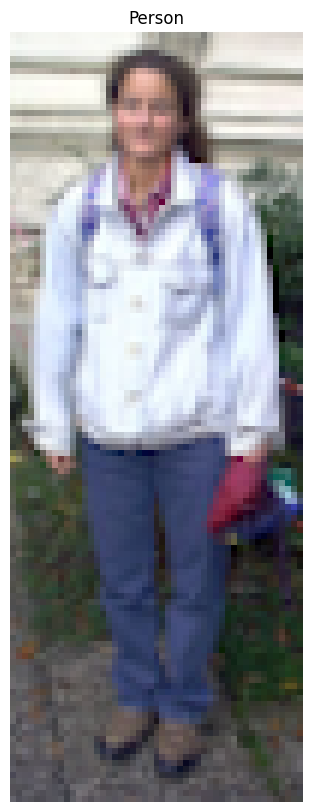

In [6]:
# solution
person=io.imread(dir+'person_template.bmp')

cp.custom_grids([person],1,1,['Person'],fig_size=(5,5)axis='off',use_grid_spec=False).show()

orien=[8,10,12]
ppc=[(6,6),(10,10),(12,12)]
cpb=[(2,2),(3,3),(4,4)]
bn=[ 'L1-sqrt', 'L2', 'L2-Hys']
hogs=[]
for value in range(len(orien)):
  for value2 in range(len(ppc)):
    for value3 in range(len(cpb)):
      for value4 in range(len(bn)):
        hog=feature.hog(astr,orientations=orien[value], pix_per_cell=ppc[value2],cells_per_block=cpb[value3],block_norm=bn[value4],channel_axis=-1, visualize=True)[1]
        hogs.append(hog)
        hog_plot.add_plot(f'HOG {orien[value]} or. {ppc[value2]}-PPC {cpb[value3]}-CPB  {bn[value4]}-BN ').imshow(hog_astr[value], cmap='gray')


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a matplotlib subplot*


In [ ]:
# solution



*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

*(Double-click or enter to edit)*

...

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   What is the difference between using dot product and euclidean distance?

**Solution**

*(Double-click or enter to edit)*

...

*   Compare template matching and HOG.
*   What are the advantages of HOG over template matching algorithm.

**Solution**

*(Double-click or enter to edit)*

...


---

## **End of L2_1: Template Matching and HOG**
Deadline for L2_1 submission in CampusVirtual is: **6th of November, 2023**
